# Warning

don't run all cells at once, visualizations take up a lot of space

In [213]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import sys
from matplotlib import pyplot as plt
from functools import reduce
import os
import altair as alt

sys.path.append("../src/")
from features.graph_embed import GraphEmbed
from models.cluster_graphs import ClusterGraphs
from visualization.visualize import Visualize
print("import done")

import done


## Compiling all analysis types

In [214]:
cluster_f_name = 'pheme_graphs_clustered.pkl'
raw_data = pd.read_csv('../data/raw/pheme/pheme_all_events.csv')

<ipython-input-214-5b68a4846b13>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../data/raw/pheme/pheme_all_events.csv')


In [215]:
default_a_type = 'user_level'
all_clusters = {}
all_graphs = {}
all_viz = {}
for f in os.listdir("../data/archived/"):
    if f.startswith("."):
        continue
    clusters = pd.read_pickle(os.path.join("..", "data", "archived", f, cluster_f_name))
    clusters['analysis_type'] = f
    all_clusters[f] = clusters

    graphs = GraphEmbed.read_graphs(clusters)
    all_graphs[f] = graphs
    all_viz[f] = Visualize(clusters, graphs)

clusters = pd.read_pickle(os.path.join("..", "models", cluster_f_name))
clusters['analysis_type'] = default_a_type
all_clusters[default_a_type] = clusters

graphs = GraphEmbed.read_graphs(clusters)
all_graphs[default_a_type] = graphs
all_viz[default_a_type] = Visualize(clusters, graphs)

In [ ]:
analysis_types = list(all_clusters.keys())
analysis_types

In [ ]:
all_clusters[analysis_types[0]].columns

In [ ]:
raw_data.title.nunique()

In [ ]:
num_clusters = 3

In [ ]:
cl = ClusterGraphs(clusters)
num_clusters, inertias = cl.choose_clust_num_k_means()

In [ ]:
plt.plot(inertias)

In [ ]:
num_clusters

In [ ]:
len(clusters)

In [ ]:
ind_clusts = {}
for k, v in all_clusters.items():
    clusts = []
    for i in range(num_clusters):
        clusts.append(v.loc[v.label == i])
    ind_clusts[k] = clusts

## Exploring Differences between Clusters

### Central Network of each cluster

#### User Level

In [ ]:
all_viz['user_level'].viz_graphs(clusters.loc[clusters.is_mean_vec == True].id.to_list())

#### Tweet Level

In [ ]:
tweet_l = all_clusters['tweet_level']
all_viz['tweet_level'].viz_graphs(tweet_l.loc[tweet_l.is_mean_vec == True].id.to_list())

### Cluster Size

In [ ]:
all_viz['user_level'].plot_cluster_size()

In [ ]:
all_viz['tweet_level'].plot_cluster_size()

In [ ]:
all_viz['user_level_no_unverified'].plot_cluster_size()

In [ ]:
all_viz['tweet_level_no_unverified'].plot_cluster_size()

### Topological Features

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {"num_nodes": "Number of Nodes"}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {"num_nodes": "Number of Nodes"}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {"num_wcc": "Number of Components user level"}, 200, 250, 1)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {"num_wcc": "Number of Components tweet level"}, 200, 250, 1)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'largest_wcc': "Largest Component user level"}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'largest_wcc': "Largest Component tweet level"}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'diameter_largest_wcc': 'largest component user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'diameter_largest_wcc': 'largest component tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'wiener_index': 'wiener index user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'wiener_index': 'wiener index tweet level'}, 200, 250, 3)

### Text Features

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'sentiment_mean': 'sentiment mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'sentiment_mean': 'sentiment mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'mean_tweet_len': 'mean tweet len user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'mean_tweet_len': 'mean tweet len tweet level'}, 200, 250, 3)

### Social Features

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'user_friends_count_mean': 'user friend count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'user_friends_count_mean': 'user friend count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'user_follower_count_mean': 'user follower count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'user_follower_count_mean': 'user follower count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'user_tweet_count_mean': 'user tweet count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'user_tweet_count_mean': 'user tweet count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'mentions_count_mean': 'mentions count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'mentions_count_mean': 'mentions count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'favorite_count_mean': 'favorite count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'favorite_count_mean': 'favorite count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'retweet_count_mean': 'retweet count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'retweet_count_mean': 'retweet count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'hashtags_count_mean': 'hashtag count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'hashtags_count_mean': 'hashtag count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'media_count_mean': 'media count mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'media_count_mean': 'media count mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'urls_mean': 'urls mean user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'urls_mean': 'urls mean tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].graph_point_range_cluster_info(True, {'mean_user_mentions': 'mean_user_mentions user level'}, 200, 250, 3)

In [ ]:
all_viz['tweet_level'].graph_point_range_cluster_info(True, {'mean_user_mentions': 'mean_user_mentions tweet level'}, 200, 250, 3)

In [ ]:
all_viz['user_level'].viz_ind_cluster_truth()

In [ ]:
all_viz['tweet_level'].viz_ind_cluster_truth()

In [ ]:
all_viz['tweet_level_no_unverified'].viz_ind_cluster_truth()

In [ ]:
all_viz['user_level'].viz_type_clusters("truth")

In [ ]:
all_viz['tweet_level'].viz_type_clusters("truth")

In [ ]:
all_viz['user_level'].viz_type_clusters("event")

In [ ]:
all_viz['tweet_level'].viz_type_clusters("event")

In [ ]:
all_viz['user_level'].graph_reduced_dimensions(["id", "num_nodes", "title", 'truth', 'event'], 400, 400, "How Diffusion Networks Vary")

In [ ]:
all_viz['tweet_level'].graph_reduced_dimensions(["id", "num_nodes", "title", 'truth', 'event'], 400, 400, "How Diffusion Networks Vary")

## Random Tweet Level Networks

In [ ]:
rand_ids = [ind_clusts['tweet_level'][0].sample().id.values[0], ind_clusts['tweet_level'][1].sample().id.values[0], ind_clusts['tweet_level'][2].sample().id.values[0]]
all_viz['tweet_level'].viz_graphs(rand_ids)

## Trying to understand thread structure

In [282]:
def all_keys(dict_obj):
    ''' This function generates all keys of
        a nested dictionary. 
    '''
    # Iterate over all keys of the dictionary
    for key , value in dict_obj.items():
        yield key
        # If value is of dictionary type then yield all keys
        # in that nested dictionary
        if isinstance(value, dict):
            for k in all_keys(value):
                yield k

In [283]:
def recursive_g(g, dic):
    if not isinstance(dic, dict):
        return
    for k,v in dic.items():
        if isinstance(v, dict):
            for con in v.keys():
                g.add_edge(k, con)
            recursive_g(g, v)

In [216]:
rand_id = 524944399890124801
test_net = tweet_l.loc[tweet_l.id == rand_id]
struct = {"524944399890124801":{"524945108291297280":[],"524945130113863680":[],"524945376911314945":[],"524946532416884736":{"524949253312217088":{"524951483872444416":{"524967855105007616":{"524969433308340224":{"524970090912313345":{"524971261005660160":{"524971862682767360":{"524972557116915712":[]}},"524971624093982721":[]},"524970408479850496":[]}}}}},"524946767209459712":[],"524946868887756801":[],"524948340057047040":[],"524948893633871872":[],"524952198170836992":{"524952535548063745":{"524953373200891904":{"524953954111995904":[]}}}}}
test_g = all_graphs['tweet_level'][rand_id]
test_raw = raw_data.loc[raw_data.thread == rand_id]

In [221]:
test_raw = test_raw.loc[test_raw.is_source_tweet != 1].copy()
test_raw['in_reply_tweet'] = test_raw['in_reply_tweet'].astype(np.int64)
test_raw['in_reply_user'] = test_raw['in_reply_user'].astype(np.int64)

In [285]:
all_ids = []
for key in all_keys(struct):
    all_ids.append(int(key))

In [226]:
tweets = set(test_raw.tweet_id.unique())
replies = set(test_raw.in_reply_tweet.unique())
all_tweets = tweets.union(replies)

In [227]:
len(all_tweets)

26

In [287]:
len(all_ids)

23

In [288]:
thread_structure = nx.Graph()
recursive_g(thread_structure, struct)
nodes_thread = list(thread_structure.nodes)
mapping_thread = {nodes_thread[i]: i for i in range(len(nodes_thread))}
thread_structure = nx.relabel_nodes(thread_structure, mapping_thread)

In [289]:
g = nx.from_pandas_edgelist(test_raw, "tweet_id", "in_reply_tweet", create_using=nx.DiGraph)
nodes = list(g.nodes)
mapping = {nodes[i]: i for i in range(len(nodes))}
g= nx.relabel_nodes(g, mapping)

In [295]:
dif = all_tweets.difference(set(all_ids))

In [291]:
for i in dif:
    print(i, mapping[i])

524944399890124800 1
524946532416884800 10
524952535548063680 15
524970090912313280 22


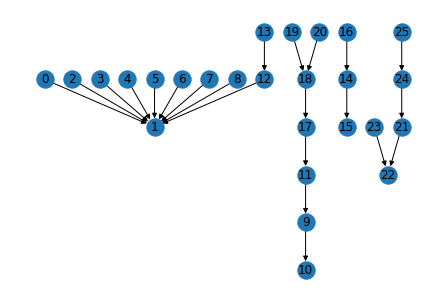

In [270]:
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos=pos, with_labels=True)

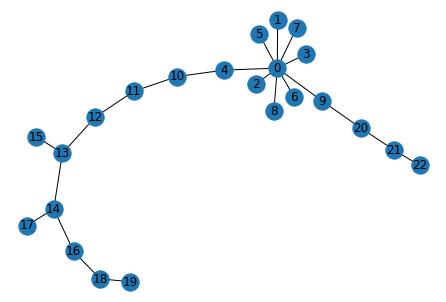

In [281]:
nx.draw(thread_structure, with_labels=True)

In [294]:
mapping

{524945108291297280: 0,
 524944399890124800: 1,
 524945130113863680: 2,
 524945376911314945: 3,
 524946532416884736: 4,
 524946767209459712: 5,
 524946868887756801: 6,
 524948340057047040: 7,
 524948893633871872: 8,
 524949253312217088: 9,
 524946532416884800: 10,
 524951483872444416: 11,
 524952198170836992: 12,
 524952535548063745: 13,
 524953373200891904: 14,
 524952535548063680: 15,
 524953954111995904: 16,
 524967855105007616: 17,
 524969433308340224: 18,
 524970090912313345: 19,
 524970408479850496: 20,
 524971261005660160: 21,
 524970090912313280: 22,
 524971624093982721: 23,
 524971862682767360: 24,
 524972557116915712: 25}

In [293]:
mapping_thread

{'524944399890124801': 0,
 '524945108291297280': 1,
 '524945130113863680': 2,
 '524945376911314945': 3,
 '524946532416884736': 4,
 '524946767209459712': 5,
 '524946868887756801': 6,
 '524948340057047040': 7,
 '524948893633871872': 8,
 '524952198170836992': 9,
 '524949253312217088': 10,
 '524951483872444416': 11,
 '524967855105007616': 12,
 '524969433308340224': 13,
 '524970090912313345': 14,
 '524970408479850496': 15,
 '524971261005660160': 16,
 '524971624093982721': 17,
 '524971862682767360': 18,
 '524972557116915712': 19,
 '524952535548063745': 20,
 '524953373200891904': 21,
 '524953954111995904': 22}